In [1]:
import sys
import os

dir_name = os.getcwd().split('/')[-1]
parent_path = os.getcwd()[:-(len(dir_name) + 1)]
sys.path.append(parent_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from lib.FT_modelling import *
from lib.formatter import * 
from lib.conversions import *

In [27]:
pupil = pupil_from_fits("pupil.fits")
print(pupil.shape)

(4000, 4000)


(4000, 4000)


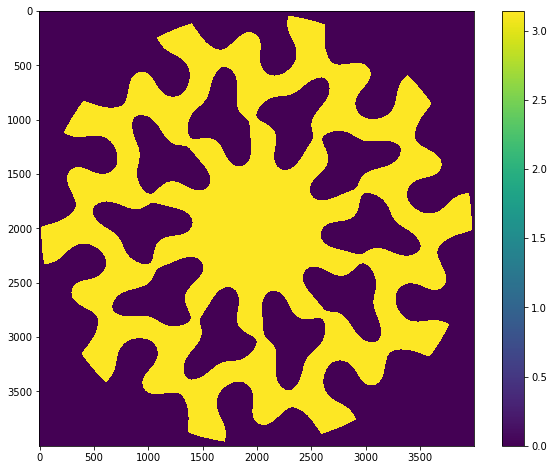

In [5]:
print(pupil.shape)
plt.figure(figsize=(10,8))
plt.imshow(np.angle(pupil))
plt.colorbar()
plt.show()

In [6]:
# Set the simulation parameters

aperture = 0.018 # 18mm
m2_obsc = 0 # m
wl = 525e-9 # 525nm - Central green band on RBP cam
focal_length = 0.15 # 15cm camera lens
chip_dim = 256 # Only simulate central region
pix_size = 1.12e-6 # 1.12 microns
transform_size = 2**9 # 1024
x = 0 # On-axis star (pixel units)
y = 0 # On-axis star (pixel units)
leakage = 0.02 # Approximately 2% leakage across visual

sim_dict = {
    "aperture": aperture,
    "m2_obsc": m2_obsc,
    "wl": wl,
    "focal_length": focal_length,
    "chip_dim": chip_dim,
    "pix_size": pix_size,
    "leakage": leakage,
    "transform_size": transform_size
}

In [7]:
%%time 
data = FT_model(pupil, aperture, m2_obsc, chip_dim, wl, focal_length, pix_size, transform_size, x, y, leakage=leakage)

CPU times: user 489 ms, sys: 56.4 ms, total: 545 ms
Wall time: 547 ms


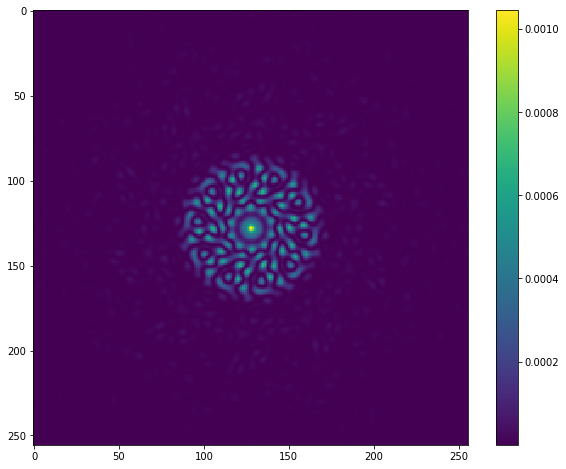

In [8]:
plt.figure(figsize=(10,8))
plt.imshow(data)
plt.colorbar()
plt.show()

In [ ]:
def model(parameters, time, flux):
    a, b, c, d = parameters
    
minimize(model, x0, args=(time, flux))

In [9]:
from scipy.optimize import least_squares as lsq

In [12]:
# inputs = [x, y, scale]

print(sim_dict["transform_size"])

def eval_model(inputs):
    """
    evaluates the input model against the data
    """
    x = inputs[0]
    y = inputs[1]
    scale = inputs[2]
        
    model = FT_model(pupil, sim_dict["aperture"], sim_dict["m2_obsc"], sim_dict["chip_dim"], 
                     sim_dict["wl"], sim_dict["focal_length"], sim_dict["pix_size"], sim_dict["transform_size"], 
                     x, y, leakage=sim_dict["leakage"])
    data = FT_model(pupil, aperture, m2_obsc, chip_dim, wl, focal_length, pix_size, transform_size, x, y, leakage=leakage)
    im = scale*model
    
    errors = np.abs(data - im).flatten()
    return errors

512


In [24]:
rands = (np.random.rand(3) - 0.5) * 0.1 # Generate random values between -0.1 and 0.1
inputs = [rands[0], rands[1], 1+rands[2]]
print(inputs)

[-0.042668362994666836, -0.002221988180090695, 1.0375888943937128]


In [25]:
%%time
out = lsq(eval_model, inputs, ftol=1e-10)

CPU times: user 8.4 s, sys: 916 ms, total: 9.31 s
Wall time: 8.8 s


In [26]:
[print("{}: \t\t {}".format(val, out[val])) for val in out]

x: 		 [-0.04266836 -0.00222199  1.        ]
cost: 		 2.233379871183816e-29
fun: 		 [1.65502297e-20 2.12949377e-20 2.02361465e-20 ... 4.19380571e-21
 1.78141617e-20 4.14781446e-20]
jac: 		 [[-0.00000000e+00 -0.00000000e+00  3.91910584e-08]
 [-0.00000000e+00 -0.00000000e+00  5.04258595e-08]
 [-0.00000000e+00 -0.00000000e+00  4.79118030e-08]
 ...
 [-0.00000000e+00 -0.00000000e+00  9.92871219e-09]
 [-0.00000000e+00 -0.00000000e+00  4.21739439e-08]
 [-0.00000000e+00 -0.00000000e+00  9.82078712e-08]]
grad: 		 [-1.56631766e-33  0.00000000e+00  1.05765050e-16]
optimality: 		 1.0576504984458508e-16
active_mask: 		 [0. 0. 0.]
nfev: 		 2
njev: 		 2
status: 		 1
message: 		 `gtol` termination condition is satisfied.
success: 		 True


[None, None, None, None, None, None, None, None, None, None, None, None]